<a href="https://colab.research.google.com/github/misqualzarabi/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Copy_of_LS_DS_111_A_First_Look_at_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - A First Look at Data



## Lecture - let's explore Python DS libraries and examples!

The Python Data Science ecosystem is huge. You've seen some of the big pieces - pandas, scikit-learn, matplotlib. What parts do you want to see more of?

In [0]:
2 + 2

4

## Assignment - now it's your turn

Pick at least one Python DS library, and using documentation/examples reproduce in this notebook something cool. It's OK if you don't fully understand it or get it 100% working, but do put in effort and look things up.

In [0]:

import matplotlib.pyplot as plt
import pandas as pd

In [0]:
a = [250,325,400,276,355]
b = [625,900,763,930,1000]

In [68]:
df = pd.DataFrame({'economy_class':a, 'business_class':b})
df
df.head()

,economy_class,business_class
0,250,625
1,325,900
2,400,763
3,276,930
4,355,1000


In [69]:
df.business_class

0     625
1     900
2     763
3     930
4    1000
Name: business_class, dtype: int64

In [70]:
df.shape

(5, 2)

In [71]:
df.head()

,economy_class,business_class
0,250,625
1,325,900
2,400,763
3,276,930
4,355,1000


In [72]:
df.describe

<bound method NDFrame.describe of    economy_class  business_class
0            250             625
1            325             900
2            400             763
3            276             930
4            355            1000>

In [0]:
df['economy_business_class'] = 5 * df.economy_class / df.business_class


In [74]:
df

,economy_class,business_class,economy_business_class
0,250,625,2.000000
1,325,900,1.805556
2,400,763,2.621232
3,276,930,1.483871
4,355,1000,1.775000


In [75]:
df.shape

(5, 3)

In [76]:
df.describe

<bound method NDFrame.describe of    economy_class  business_class  economy_business_class
0            250             625                2.000000
1            325             900                1.805556
2            400             763                2.621232
3            276             930                1.483871
4            355            1000                1.775000>

In [77]:
df.isna()

,economy_class,business_class,economy_business_class
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


In [0]:
x = df.economy_class
y = df.business_class

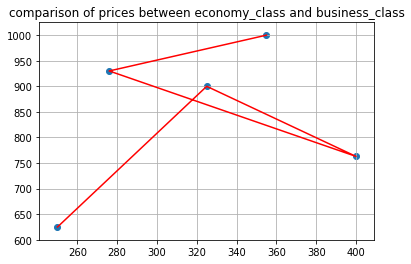

In [79]:
plt.plot(x, y , color='red')
plt.scatter(x,y)
plt.grid()
plt.title("comparison of prices between economy_class and business_class")
plt.show()

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  Describe in a paragraph of text what you did and why, as if you were writing an email to somebody interested but nontechnical.

2.  What was the most challenging part of what you did?

3.  What was the most interesting thing you learned?

4.  What area would you like to explore with more time?




I tried to create a data about the prices of economy and business class tickets using pandas library.then i used shape function to see how many columns and rows do we have in our dataset. I used isna to see if their is  any missing values. I also used describe function to find out about integers and floating values.Then, afterwards i added another column of'economy_business_class' by using my own formula to show them in floating numbers.I created a line and scatter plot to show the comparison of prices in the form of graph.I chose colour of my choice and also to compliment it added a grid and title.


(2). Building a graph was a bit challenging but somehow i made it.
     I was trying to add currency symbol with the numbers but i couldn't I really want to figure it out.
     

(3). The most interesting part for me to build a data of my own choice and it was the first time i did it . So i was proud of me that i can do this.

(4). I think my weak spot right now is graphs.I really want to explore them more.

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub (and since this is the first assignment of the sprint, open a PR as well).

- [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
- [matplotlib documentation](https://matplotlib.org/contents.html)
- [Awesome Data Science](https://github.com/bulutyazilim/awesome-datascience) - a list of many types of DS resources

Stretch goals:

- Find and read blogs, walkthroughs, and other examples of people working through cool things with data science - and share with your classmates!
- Write a blog post (Medium is a popular place to publish) introducing yourself as somebody learning data science, and talking about what you've learned already and what you're excited to learn more about.